# Strategic Thinking CA 1 - Key Indicators of Heart Disease USA from 2020

**Students: Marie Garron, Eugen Efros, Eduardo Cohen, Lorna Sinclair and Abdirisak Nour**

## Objective

With Supervised  machine Learning for classification model, it is possible to predict xxxxxx with satisfying accuracy %. To do so,  we will analyse the impact of several independent factors on the 2 possible outcomes: having a heart attack or not. 


1.EDA
2.Normalisation or standardisation if needed
3. PCA
4. split train-test
5. resampling ???? before PCA?
6.ML

# EDA

In [124]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import stats
import math
from collections import Counter

#visualisation
import seaborn as sns 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
#import mglearn
import matplotlib as mpl
%matplotlib inline 
#plots are shown inline with cell
plt.style.use('ggplot') #style like R studio
mpl.rcParams['axes.unicode_minus'] = False 
#use hyphen in axis
sns.set(color_codes=True)

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from collections import Counter

#Machine Learning
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split, cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_predict, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [125]:
# Import this library to suppress the warnings
# The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings
import warnings
warnings.filterwarnings('ignore')  

In [126]:
#to visualise all columns easier
pd.set_option("display.max_column", 50)
pd.set_option("display.max_row", 150)

## Overwiew of the dataset

We are using the dataset that was availble on Kaggle. This dataset is coming from:<br>
Sources: <br>


Information about the Metadata:<br>
<span class="mark">"HeartDisease" - yes or No - our target</span><br>
All dependent features: <br>


the ten first rows of the dataset

In [127]:
heart_df = pd.read_csv("dataset/heart_2020_cleaned.csv")
heart_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [128]:
print('Number of observations in the dataset:', heart_df.shape[0])
print('Number of features in the dataset:', heart_df.shape[1])

Number of observations in the dataset: 319795
Number of features in the dataset: 18


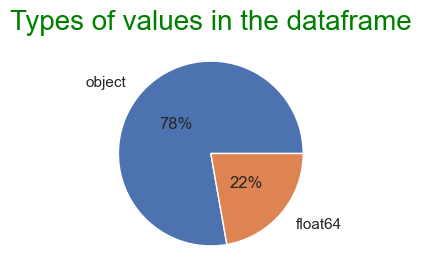

In [129]:
heart_df.dtypes.value_counts().plot(kind='pie', 
                                    autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,
                                    figsize=(3,3))

plt.title(label="Types of values in the dataframe",fontsize=20, color="green")
plt.ylabel('')
plt.show()

In [130]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [131]:
print("Percentage of missing values:", (heart_df.isna().sum().sum()/heart_df.shape[0]))

Percentage of missing values: 0.0


## Duplicates and uniqueness of the variables

In [132]:
print(f'Number of duplicate rows:', heart_df.duplicated().sum(), '\n' ,
      'Percentage of the total values: ',round((heart_df.duplicated().sum()/heart_df.shape[0])*100, 2),'%' )

Number of duplicate rows: 18078 
 Percentage of the total values:  5.65 %


**We have 5.65% of duplicate rows. xxx**


In [133]:
duplicate = heart_df[heart_df.duplicated(keep = 'last')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
24,No,25.75,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,6.0,No,No,Yes
41,No,28.13,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Excellent,8.0,No,No,No
46,No,33.23,No,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Very good,8.0,No,No,No
102,No,23.49,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,8.0,No,No,No
104,No,25.09,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317618,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No
318065,No,28.06,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,9.0,No,No,No
318703,No,19.74,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
318736,No,24.41,Yes,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No


In [134]:
heart_df[(heart_df.BMI == 27.46) &
      (heart_df.HeartDisease == "No") &
      (heart_df.Smoking =="No") & 
      (heart_df.Sex == "Female") &
      (heart_df.AgeCategory == "45-49") &
      (heart_df.Race == "Hispanic") &
     (heart_df.SleepTime == 8.0) &
      (heart_df.GenHealth == "Excellent") &
     (heart_df.KidneyDisease == "No")]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
317618,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No
319117,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No


In [135]:
heart_df = heart_df.drop_duplicates()

In [136]:
print('Number of observations in the dataset,without the duplicates:', heart_df.shape[0])

Number of observations in the dataset,without the duplicates: 301717


**Checking the uniqueness in all features to see if we do not have any missing values and/or any kind of "exotic" values that would have change the type.**

In [137]:
for col in heart_df:
    print(f'{col:-<25} {heart_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
BMI---------------------- [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking------------------ ['Yes' 'No']
AlcoholDrinking---------- ['No' 'Yes']
Stroke------------------- ['No' 'Yes']
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking-------------- ['No' 'Yes']
Sex---------------------- ['Female' 'Male']
AgeCategory-------------- ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race--------------------- ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic----------------- ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity--------- ['Yes' 'No']
GenHealth-----

## Target value 

In [138]:
target= heart_df.iloc[: , [0]].copy() 
print("Percentage of negative class:", round((target[target['HeartDisease']== "No"].shape[0] / target.shape[0]) * 100), '%')
print("Percentage of positive class:", round((target[target['HeartDisease']== "Yes"].shape[0] / target.shape[0]) * 100), '%')
print(f'The target proportion is', 
      int(len(target[target['HeartDisease']== "No"])/len(target[target['HeartDisease']== "Yes"])),':1')

Percentage of negative class: 91 %
Percentage of positive class: 9 %
The target proportion is 10 :1


Text(0.5, 1.0, 'Target Value Count')

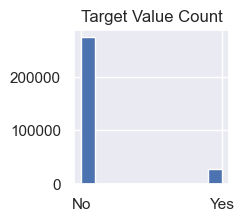

In [139]:
# Histogram plot of APS categories
fig, ax = plt.subplots(figsize=(2,2))

plt.hist(target['HeartDisease'])
plt.title("Target Value Count")

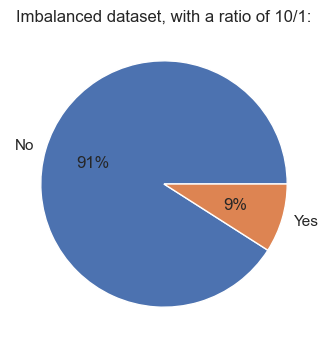

In [140]:
fig, ax = plt.subplots(1, 1,figsize =(5, 4))
ax.pie(target['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('Imbalanced dataset, with a ratio of 10/1:')
fig.show()

## Independant variables 

 **3 types of variables:**<br>
 - Categoricales (type yes/no, ordinal, etc.) 
 - Numerical 
 - Age Category

In [141]:
cat = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
'Asthma', 'KidneyDisease', 'SkinCancer']

num = ['HeartDisease', 'AgeCategory','BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

cat_df = heart_df[cat].copy()
num_df = heart_df[num].copy()
num_df.head()

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime
0,No,55-59,16.60,3.0,30.0,5.0
1,No,80 or older,20.34,0.0,0.0,7.0
2,No,65-69,26.58,20.0,30.0,8.0
3,No,75-79,24.21,0.0,0.0,6.0
4,No,40-44,23.71,28.0,0.0,8.0


### Quick overview of the categorical features

In [142]:
print( f'The first row of the dataset:\n')
cat_df.head(6)

The first row of the dataset:



,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
5,Yes,Yes,No,No,Yes,Female,Black,No,No,Fair,No,No,No


**We are going to check if we do have an interesting correlation between all features and get further information to keep going with the EDA**

In [143]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

In [144]:
cat_df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

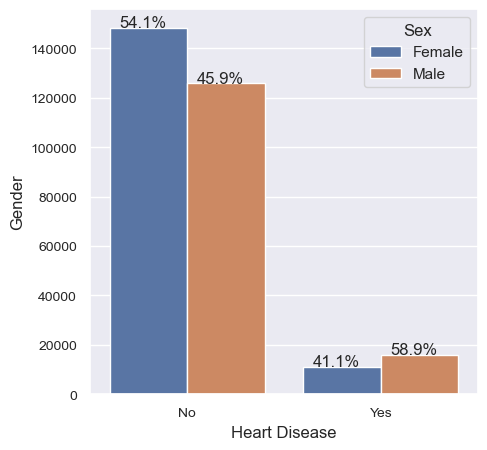

In [145]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Sex", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Gender", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

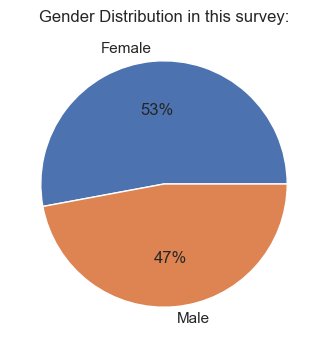

In [146]:
fig, ax = plt.subplots(1, 1,figsize =(5, 4))
ax.pie(cat_df['Sex'].value_counts(),autopct='%1.0f%%',labels=['Female','Male'])
ax.set_title('Gender Distribution in this survey:')
fig.show()

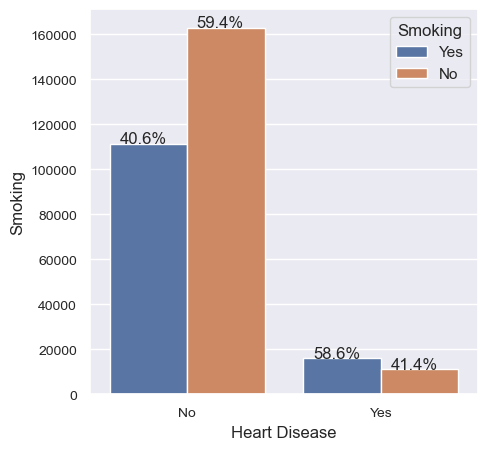

In [147]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Smoking", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Smoking", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

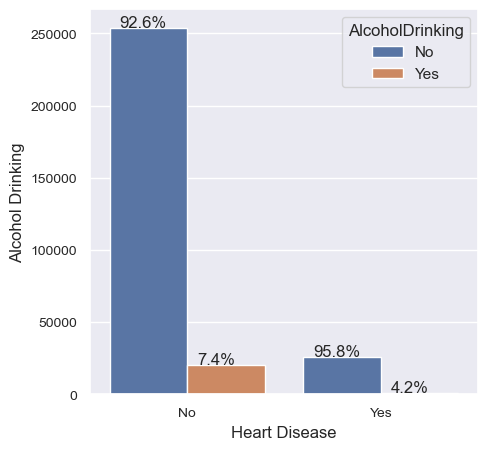

In [148]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="AlcoholDrinking", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Alcohol Drinking", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

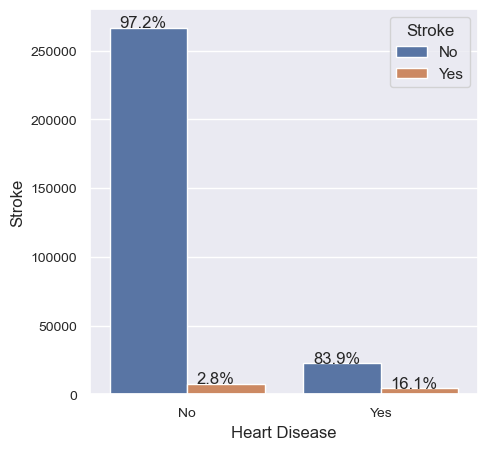

In [149]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Stroke", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Stroke", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

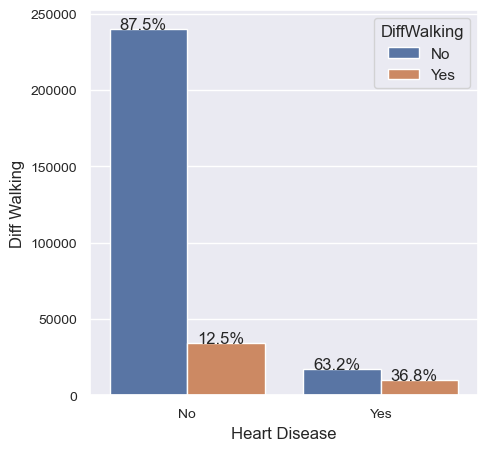

In [150]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="DiffWalking", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Diff Walking", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

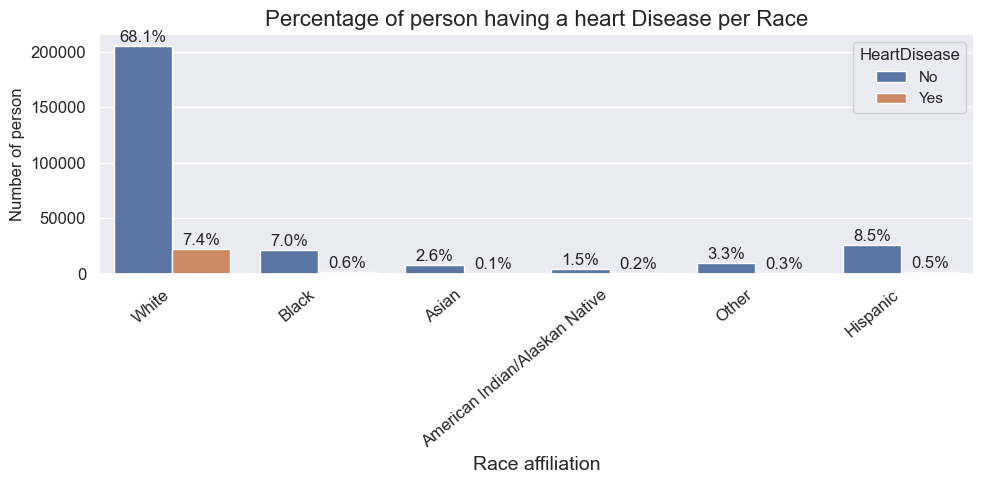

In [151]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = cat_df, x='Race', hue= 'HeartDisease')

plt.xticks(size=12)
plt.xlabel('Race affiliation', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease per Race", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(cat_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

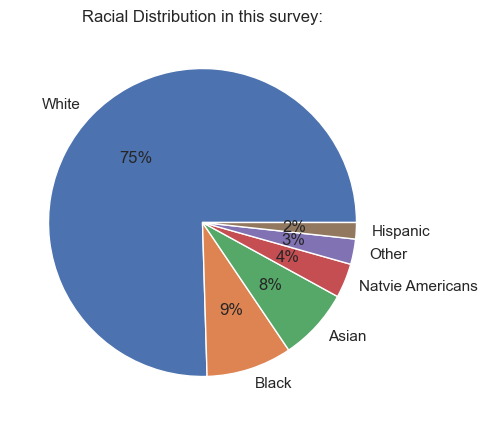

In [152]:
fig, ax = plt.subplots(1, 1,figsize =(5, 5))
ax.pie(cat_df['Race'].value_counts(),autopct='%1.0f%%',
       labels=['White','Black', 'Asian', 'Natvie Americans', 'Other', 'Hispanic'])
ax.set_title('Racial Distribution in this survey:')
fig.show()

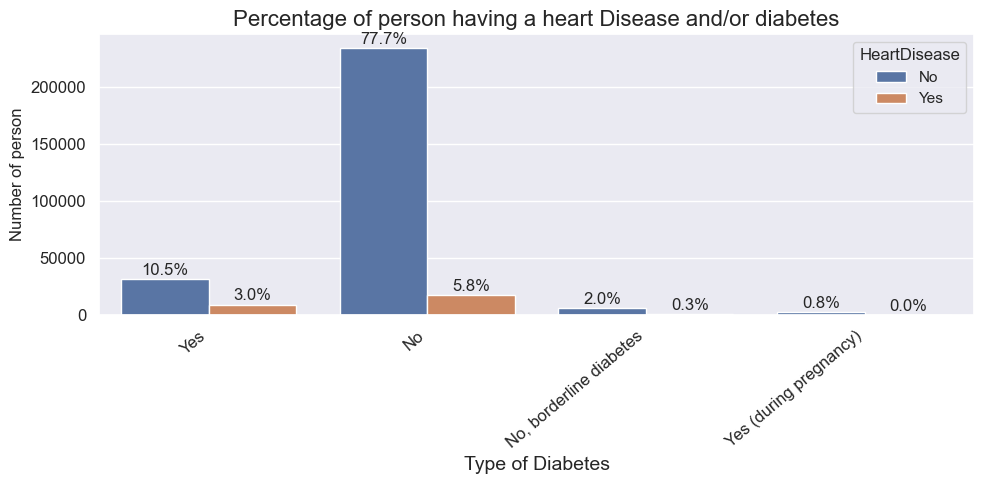

In [153]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = cat_df, x='Diabetic', hue= 'HeartDisease')

plt.xticks(size=12)
plt.xlabel('Type of Diabetes', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease and/or diabetes", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(cat_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

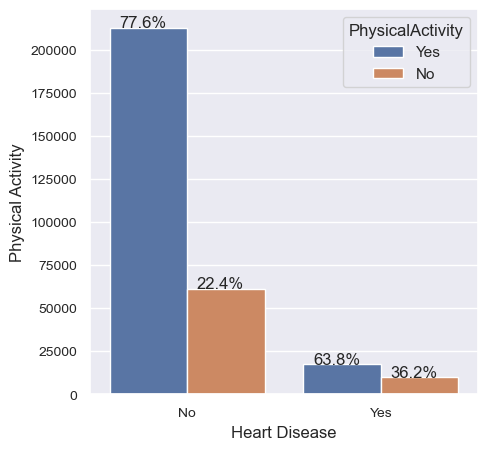

In [154]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="PhysicalActivity", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Physical Activity", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

In [155]:
hue_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

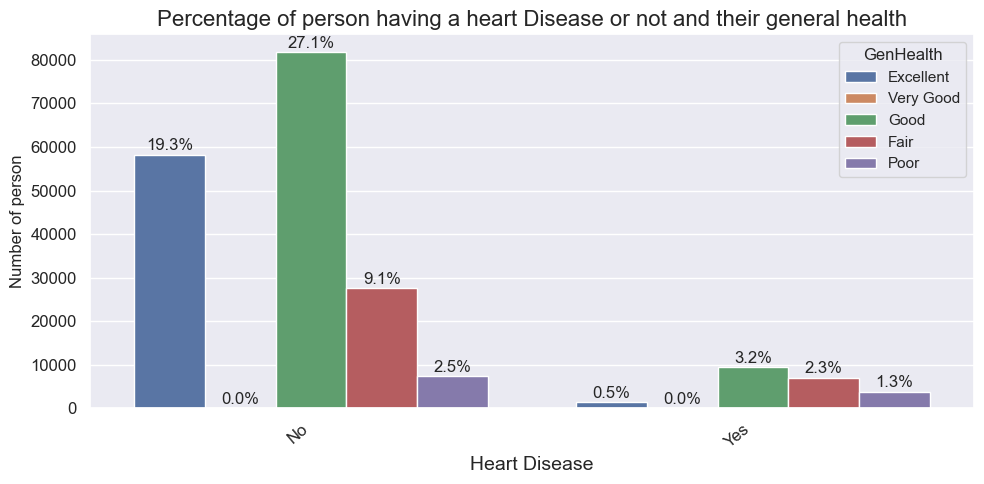

In [156]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = cat_df, x='HeartDisease', hue= 'GenHealth', hue_order=hue_order)

plt.xticks(size=12)
plt.xlabel('Heart Disease', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease or not and their general health", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(cat_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

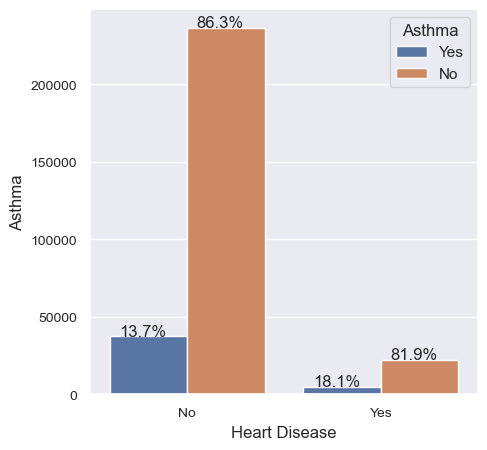

In [157]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Asthma", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Asthma", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

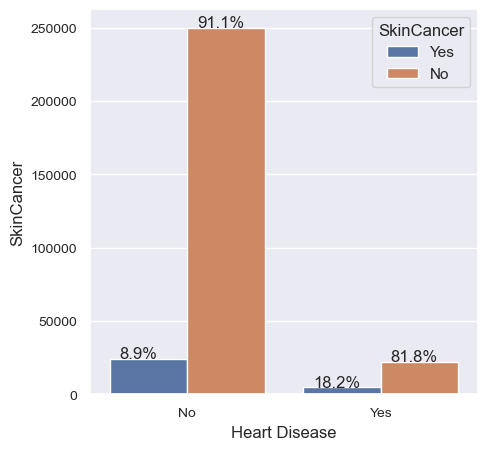

In [158]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="SkinCancer", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("SkinCancer", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

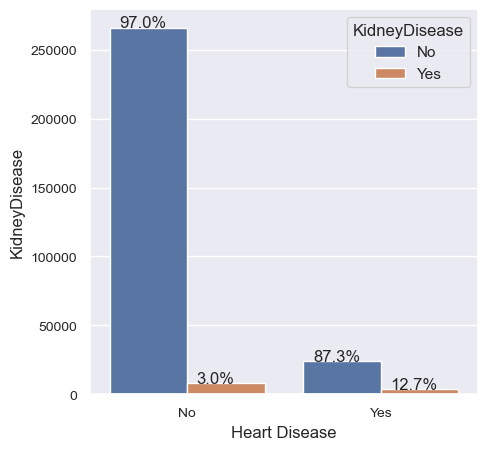

In [159]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="KidneyDisease", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("KidneyDisease", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

### Quick overview of the numerical features 

In [160]:
num_df.columns

Index(['HeartDisease', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth',
       'SleepTime'],
      dtype='object')

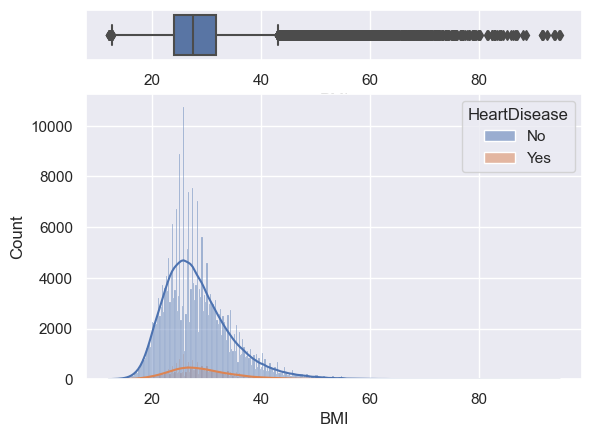

In [161]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(num_df, x="BMI", ax=ax_box)
sns.histplot(data=num_df, x="BMI",hue='HeartDisease',  ax=ax_hist, kde=True, log_scale=False)

plt.show()

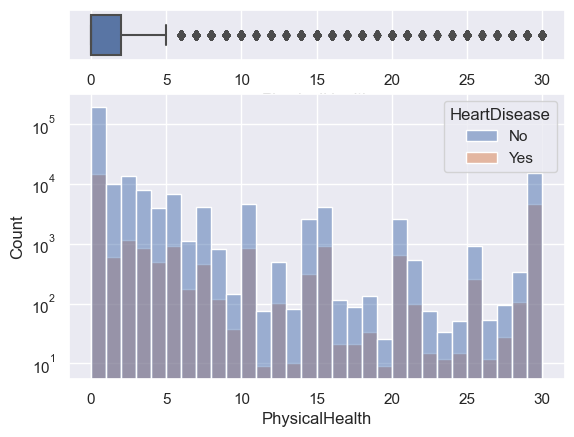

In [162]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="PhysicalHealth", ax=ax_box)
sns.histplot(data=num_df, x="PhysicalHealth", hue='HeartDisease',  ax=ax_hist, bins=30)

plt.yscale('log')
plt.show()

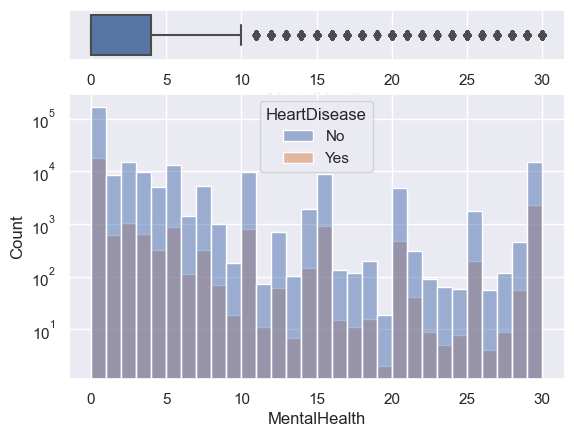

In [163]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="MentalHealth", ax=ax_box)
sns.histplot(data=num_df, x="MentalHealth", hue='HeartDisease',  ax=ax_hist, bins=30)

plt.yscale('log')
plt.show()

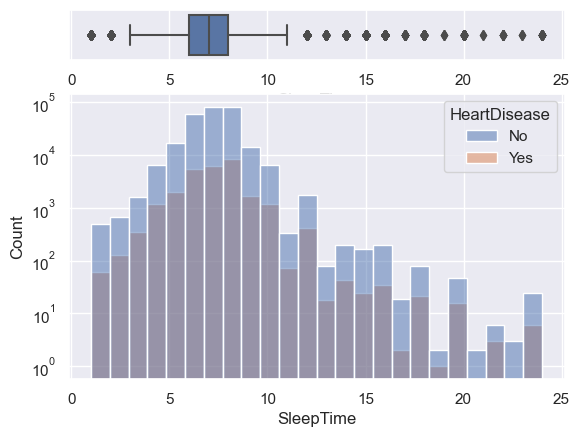

In [164]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="SleepTime", ax=ax_box)
sns.histplot(data=num_df, x="SleepTime", hue='HeartDisease',  ax=ax_hist, bins=24)

plt.yscale('log')
plt.show()

### Age category 

**Note** : year of the survey :2020<br>
**GI Generation** :Born 1901–1924.<br>
**The Silent Generation**: Born 1928–1945.<br>
**Baby Boom Generation**: Born 1946–1964. <br>
**Generation X**: Born 1965–1980.<br>
**Millennial Generation**: Born 1981–1996.<br>
**Generation Z**: Born 1997–2010.<br> 

In [165]:
num_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [166]:
num_df['Age'] = num_df['AgeCategory'].copy()
num_df['Age'] = num_df['Age'].str[:2]
num_df['Age'] = num_df['Age'].astype(int)

In [167]:
num_df["Age_Gen"] = pd.cut(num_df["Age"],bins=[17, 23, 39, 55, 74, np.inf],
                           labels=["GenZ", "Millenium", "GenX", "Boomer","Elderly"], 
                           right=True)

In [168]:
num_df['Age_Gen'].unique()

['GenX', 'Elderly', 'Boomer', 'GenZ', 'Millenium']
Categories (5, object): ['GenZ' < 'Millenium' < 'GenX' < 'Boomer' < 'Elderly']

In [169]:
num_df.head(10)

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX
5,Yes,75-79,28.87,6.0,0.0,12.0,75,Elderly
6,No,70-74,21.63,15.0,0.0,4.0,70,Boomer
7,No,80 or older,31.64,5.0,0.0,9.0,80,Elderly
8,No,80 or older,26.45,0.0,0.0,5.0,80,Elderly
9,No,65-69,40.69,0.0,0.0,10.0,65,Boomer


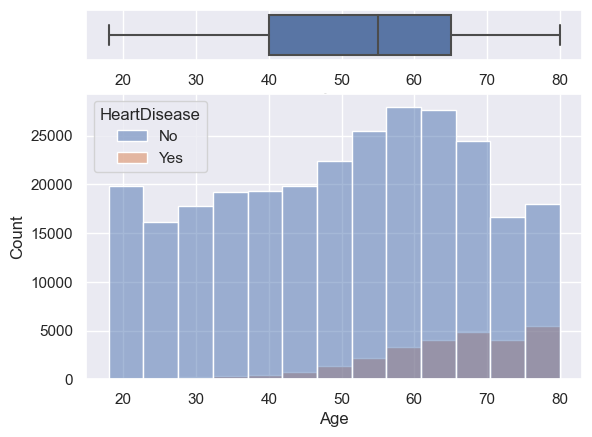

In [170]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="Age", ax=ax_box)
sns.histplot(data=num_df, x="Age", hue='HeartDisease', ax=ax_hist, bins=13)

plt.show()

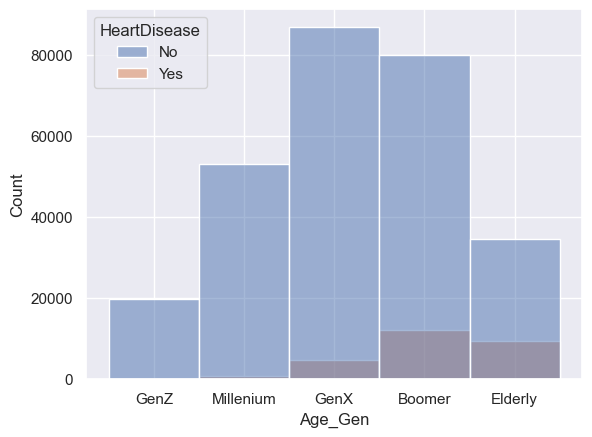

<Figure size 500x400 with 0 Axes>

In [171]:
sns.set_theme(style="darkgrid")
sns.histplot(data=num_df, x="Age_Gen", hue='HeartDisease')

plt.figure(figsize=(5,4))
plt.show()

In [173]:
# create a crosstab to count the number of class 0 and 1 values by age category
table = pd.crosstab(num_df['Age_Gen'], num_df['HeartDisease'])
table['total'] = table['No']+table['Yes']
print(table)

HeartDisease     No    Yes  total
Age_Gen                          
GenZ          19868    130  19998
Millenium     53136    655  53791
GenX          86890   4811  91701
Boomer        79950  12212  92162
Elderly       34612   9453  44065


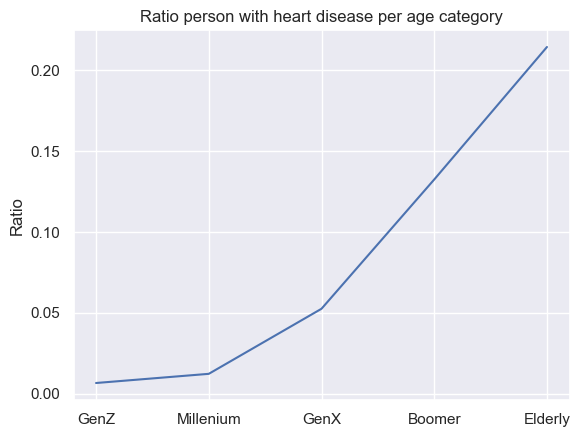

In [183]:
for i in num_df:
    numerator = table['Yes']
    denominator = table['total']
    ratio = [n / d for n, d in zip(numerator, denominator)]

# create a line plot of the ratio
plt.plot(ratio)
plt.xticks([0, 1, 2, 3, 4], ['GenZ', 'Millenium', 'GenX', 'Boomer','Elderly' ])
plt.ylabel('Ratio')
plt.title('Ratio person with heart disease per age category')

plt.show()

# Preprocessing

## Ordinal Encoding

In [49]:
#to visualise all columns easier
pd.set_option("display.max_column", 50)
pd.set_option("display.max_row", 150)

Binning BMI for better insights
If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to <25, it falls within the healthy weight range. If your BMI is 25.0 to <30, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obesity range. (cdc)

In [50]:
bins = [0, 18.5, 25, 30, np.inf]
print(bins)

[0, 18.5, 25, 30, inf]


In [51]:
names = ['underweight', 'healthy weight','Overweight', 'Obesity']
num_df['BMICategory'] = pd.cut(num_df['BMI'], bins, labels=names)

In [52]:
#heart_df.drop('BMI',axis=1,inplace=True)
num_df.head(10)

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen,BMICategory
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX,underweight
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly,healthy weight
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer,Overweight
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly,healthy weight
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX,healthy weight
5,Yes,75-79,28.87,6.0,0.0,12.0,75,Elderly,Overweight
6,No,70-74,21.63,15.0,0.0,4.0,70,Boomer,healthy weight
7,No,80 or older,31.64,5.0,0.0,9.0,80,Elderly,Obesity
8,No,80 or older,26.45,0.0,0.0,5.0,80,Elderly,Overweight
9,No,65-69,40.69,0.0,0.0,10.0,65,Boomer,Obesity


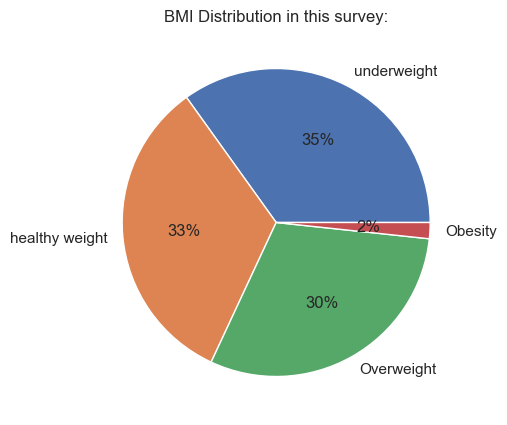

In [53]:
fig, ax = plt.subplots(1, 1,figsize =(5, 5))
ax.pie(num_df['BMICategory'].value_counts(),autopct='%1.0f%%',
       labels=names)
ax.set_title('BMI Distribution in this survey:')
fig.show()

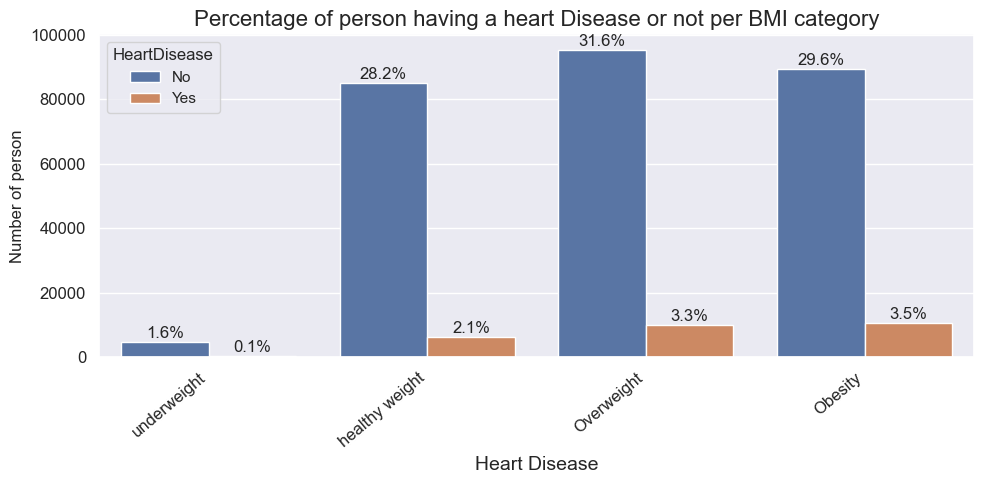

In [54]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = num_df, x='BMICategory', hue= 'HeartDisease')

plt.xticks(size=12)
plt.xlabel('Heart Disease', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease or not per BMI category", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(num_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [55]:
num_df.head(5)

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen,BMICategory
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX,underweight
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly,healthy weight
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer,Overweight
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly,healthy weight
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX,healthy weight


In [56]:
num_df = num_df.replace({'BMICategory': 
                               {'underweight': 0, 'healthy weight': 1, 'Overweight': 2, 'Obesity': 3}})

In [57]:
num_df = num_df.replace({'Age_Gen': 
                               { 'GenZ': 0, 'Millenium': 1, 'GenX': 2, 'Boomer': 3, 'Elderly': 4}})

In [58]:
num_df.head(5)

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen,BMICategory
0,No,55-59,16.60,3.0,30.0,5.0,55,2,0
1,No,80 or older,20.34,0.0,0.0,7.0,80,4,1
2,No,65-69,26.58,20.0,30.0,8.0,65,3,2
3,No,75-79,24.21,0.0,0.0,6.0,75,4,1
4,No,40-44,23.71,28.0,0.0,8.0,40,2,1


In [59]:
cat_df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [60]:
for col in cat_df:
    print(f'{col:-<25} {cat_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
Smoking------------------ ['Yes' 'No']
AlcoholDrinking---------- ['No' 'Yes']
Stroke------------------- ['No' 'Yes']
DiffWalking-------------- ['No' 'Yes']
Sex---------------------- ['Female' 'Male']
Race--------------------- ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic----------------- ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity--------- ['Yes' 'No']
GenHealth---------------- ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma------------------- ['Yes' 'No']
KidneyDisease------------ ['No' 'Yes']
SkinCancer--------------- ['Yes' 'No']


In [61]:
cat_df['HeartDisease'] = cat_df['HeartDisease'] .eq('Yes').mul(1)
cat_df['Smoking'] = cat_df['Smoking'].eq('Yes').mul(1)
cat_df['AlcoholDrinking'] = cat_df['AlcoholDrinking'].eq('Yes').mul(1)
cat_df['Stroke'] = cat_df['Stroke'].eq('Yes').mul(1)
cat_df['DiffWalking'] = cat_df['DiffWalking'].eq('Yes').mul(1)
cat_df['PhysicalActivity'] = cat_df['PhysicalActivity'].eq('Yes').mul(1)
cat_df['Asthma'] = cat_df['Asthma'].eq('Yes').mul(1)
cat_df['KidneyDisease'] = cat_df['KidneyDisease'].eq('Yes').mul(1)
cat_df['SkinCancer'] = cat_df['SkinCancer'].eq('Yes').mul(1)

cat_df['Sex'] = cat_df['Sex'].eq('Female').mul(1) 

cat_df = cat_df.replace({'Diabetic': { 'No': 0, 'No, borderline diabetes': 1, 'Yes': 2, 'Yes (during pregnancy)': 3}})
cat_df = cat_df.replace({'GenHealth': { 'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}})
cat_df = cat_df.replace({'Race': {'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Hispanic': 4, 'Other': 5 }})


In [62]:
for col in cat_df:
    print(f'{col:-<25} {cat_df[col].unique()}')

HeartDisease------------- [0 1]
Smoking------------------ [1 0]
AlcoholDrinking---------- [0 1]
Stroke------------------- [0 1]
DiffWalking-------------- [0 1]
Sex---------------------- [1 0]
Race--------------------- [0 1 2 3 5 4]
Diabetic----------------- [2 0 1 3]
PhysicalActivity--------- [1 0]
GenHealth---------------- [3 1 2 0 4]
Asthma------------------- [1 0]
KidneyDisease------------ [0 1]
SkinCancer--------------- [1 0]


In [63]:
for col in num_df:
    print(f'{col:-<25} {num_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
AgeCategory-------------- ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
BMI---------------------- [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime---------------- [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Age---------------------- [55 80 65 75 40 70 60 50 45 18 35 30 25]
Age_Gen------------------ [2, 4, 3, 0, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
BMICategory-------------- [0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]


In [64]:
num_df['HeartDisease'] = num_df['HeartDisease'] .eq('Yes').mul(1)

In [65]:
df2 = cat_df[['Sex', 'Race','Smoking', 'AlcoholDrinking','DiffWalking','PhysicalActivity', 'GenHealth', 
              'Diabetic', 'Asthma','Stroke','KidneyDisease', 'SkinCancer']]
df1 = num_df[['HeartDisease','Age_Gen','BMICategory',
              'PhysicalHealth','MentalHealth','SleepTime']]

frames = [df1, df2]

**dropping the chosen columns and merging the datasets.**

In [66]:
heart_df2 = pd.concat(frames, axis=1)

In [67]:
heart_df2.head()

,HeartDisease,Age_Gen,BMICategory,PhysicalHealth,MentalHealth,SleepTime,Sex,Race,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,GenHealth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,0,2,0,3.0,30.0,5.0,1,0,1,0,0,1,3,2,1,0,0,1
1,0,4,1,0.0,0.0,7.0,1,0,0,0,0,1,3,0,0,1,0,0
2,0,3,2,20.0,30.0,8.0,0,0,1,0,0,1,1,2,1,0,0,0
3,0,4,1,0.0,0.0,6.0,1,0,0,0,0,0,2,0,0,0,0,1
4,0,2,1,28.0,0.0,8.0,1,0,0,0,1,1,3,0,0,0,0,0


## Baseline Back Up point

In [68]:
for col in heart_df2:
    print(f'{col:-<25} {heart_df2[col].unique()}')

HeartDisease------------- [0 1]
Age_Gen------------------ [2, 4, 3, 0, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
BMICategory-------------- [0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime---------------- [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Sex---------------------- [1 0]
Race--------------------- [0 1 2 3 5 4]
Smoking------------------ [1 0]
AlcoholDrinking---------- [0 1]
DiffWalking-------------- [0 1]
PhysicalActivity--------- [1 0]
GenHealth---------------- [3 1 2 0 4]
Diabetic----------------- [2 0 1 3]
Asthma------------------- [1 0]
Stroke------------------- [0 1]
KidneyDisease------------ [0 1]
Skin

In [69]:
heart_df2.columns

Index(['HeartDisease', 'Age_Gen', 'BMICategory', 'PhysicalHealth',
       'MentalHealth', 'SleepTime', 'Sex', 'Race', 'Smoking',
       'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity', 'GenHealth',
       'Diabetic', 'Asthma', 'Stroke', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [70]:
heart_df2 = heart_df2[['HeartDisease', 'Sex', 'Race','Age_Gen', 
                      'BMICategory','Diabetic', 'Asthma', 'Stroke', 'KidneyDisease', 'SkinCancer',
                      'GenHealth','PhysicalActivity','PhysicalHealth','MentalHealth', 'SleepTime', 
                      'Smoking','AlcoholDrinking','DiffWalking']]

In [71]:
#df baseline
#heart_df2.to_csv('dataset/Heart_baseline.csv')
heart_baseline = pd.read_csv("dataset/heart_baseline.csv")
heart_baseline.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

## Correlation matrix of all features

In [72]:
heart_baseline.head()

,HeartDisease,Sex,Race,Age_Gen,BMICategory,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,DiffWalking
0,0,1,0,2,0,2,1,0,0,1,3,1,3.0,30.0,5.0,1,0,0
1,0,1,0,4,1,0,0,1,0,0,3,1,0.0,0.0,7.0,0,0,0
2,0,0,0,3,2,2,1,0,0,0,1,1,20.0,30.0,8.0,1,0,0
3,0,1,0,4,1,0,0,0,0,1,2,0,0.0,0.0,6.0,0,0,0
4,0,1,0,2,1,0,0,0,0,0,3,1,28.0,0.0,8.0,0,0,1


In [73]:
print("\033[1;32m Pearson Correlation Matrix amongst the dataset\n")
corr1 = heart_baseline
corr1 = corr1.corr(method='pearson')
corr1

 Pearson Correlation Matrix amongst the dataset



,HeartDisease,Sex,Race,Age_Gen,BMICategory,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,DiffWalking
HeartDisease,1.000000,-0.074435,-0.043605,0.231412,0.050030,0.163686,0.035784,0.194665,0.142672,0.090644,-0.237920,-0.093597,0.165235,0.020913,0.010834,0.104524,-0.036289,0.196420
Sex,-0.074435,1.000000,-0.001835,0.060308,-0.066145,0.010581,0.067960,0.001343,0.007579,-0.015846,-0.022366,-0.045309,0.038427,0.098916,0.014901,-0.087514,-0.006824,0.067335
Race,-0.043605,-0.001835,1.000000,-0.189944,0.019047,0.022235,0.016013,-0.016708,-0.014591,-0.124034,-0.030854,-0.041643,-0.004021,0.019259,-0.036026,-0.061402,-0.025046,-0.005412
Age_Gen,0.231412,0.060308,-0.189944,1.000000,0.025052,0.188510,-0.056909,0.137569,0.122196,0.259786,-0.185578,-0.122494,0.108919,-0.155371,0.100376,0.131318,-0.058043,0.241016
BMICategory,0.050030,-0.066145,0.019047,0.025052,1.000000,0.181359,0.062855,0.017534,0.040657,-0.026583,-0.186832,-0.116011,0.069998,0.026212,-0.041464,0.020010,-0.040004,0.132157
Diabetic,0.163686,0.010581,0.022235,0.188510,0.181359,1.000000,0.041993,0.097767,0.139596,0.027951,-0.259475,-0.125068,0.143418,0.022475,0.003940,0.047086,-0.063423,0.198877
Asthma,0.035784,0.067960,0.016013,-0.056909,0.062855,0.041993,1.000000,0.034942,0.035826,-0.005101,-0.126698,-0.032140,0.110083,0.105266,-0.045368,0.017545,-0.007114,0.095826
Stroke,0.194665,0.001343,-0.016708,0.137569,0.017534,0.097767,0.034942,1.000000,0.089109,0.046039,-0.164449,-0.074898,0.132966,0.041324,0.013697,0.058868,-0.022707,0.170664
KidneyDisease,0.142672,0.007579,-0.014591,0.122196,0.040657,0.139596,0.035826,0.089109,1.000000,0.059984,-0.171259,-0.077304,0.138219,0.032105,0.008028,0.031890,-0.031166,0.149471
SkinCancer,0.090644,-0.015846,-0.124034,0.259786,-0.026583,0.027951,-0.005101,0.046039,0.059984,1.000000,-0.042863,0.004785,0.036753,-0.040214,0.043241,0.030438,-0.008739,0.060596


<Figure size 400x400 with 0 Axes>

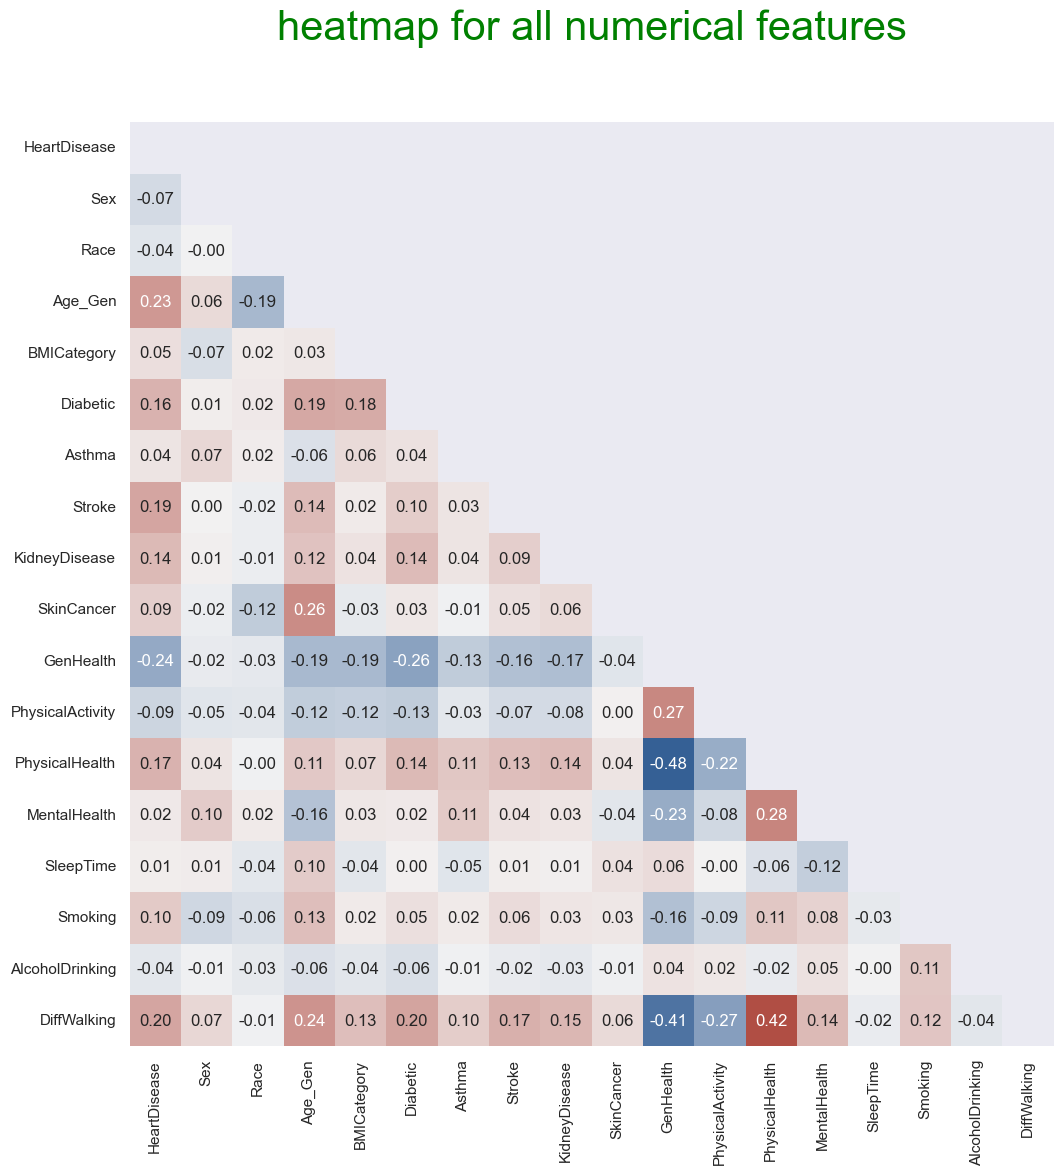

In [74]:
plt.figure(figsize=(4,4))
# Create a mask
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
g =sns.heatmap(corr1, mask=mask, center=0, cbar=False,annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.title("heatmap for all numerical features",fontsize=30, color="green", y=1.08) 
plt.show()

## Feature engineering

### Rescaling 

In [75]:
scaled_df = heart_baseline.copy()

**Create a new column where we will scale the data**

Min-max feature scaling is often simply referred to as normalization, which rescales the dataset feature to a range of 0-1.
Below the formula:

<img src="normalisation.png">

In [76]:
scaled_df['PhysicalHealth_scaled'] = scaled_df['PhysicalHealth']
scaled_df['MentalHealth_scaled'] = scaled_df['MentalHealth']
scaled_df.head()

,HeartDisease,Sex,Race,Age_Gen,BMICategory,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,DiffWalking,PhysicalHealth_scaled,MentalHealth_scaled
0,0,1,0,2,0,2,1,0,0,1,3,1,3.0,30.0,5.0,1,0,0,3.0,30.0
1,0,1,0,4,1,0,0,1,0,0,3,1,0.0,0.0,7.0,0,0,0,0.0,0.0
2,0,0,0,3,2,2,1,0,0,0,1,1,20.0,30.0,8.0,1,0,0,20.0,30.0
3,0,1,0,4,1,0,0,0,0,1,2,0,0.0,0.0,6.0,0,0,0,0.0,0.0
4,0,1,0,2,1,0,0,0,0,0,3,1,28.0,0.0,8.0,0,0,1,28.0,0.0


In [77]:
scaled_df['PhysicalHealth_scaled'] = ((scaled_df['PhysicalHealth_scaled'] - scaled_df['PhysicalHealth_scaled'].min())/
                                      (scaled_df['PhysicalHealth_scaled'].max() - scaled_df['PhysicalHealth_scaled'].min()))
scaled_df['MentalHealth_scaled'] = ((scaled_df['MentalHealth_scaled'] - scaled_df['MentalHealth_scaled'].min())/
                                    (scaled_df['MentalHealth_scaled'].max() - scaled_df['MentalHealth_scaled'].min()) 
)

In [78]:
scaled_df['MentalHealth'] = round(scaled_df['MentalHealth_scaled'], 3)
scaled_df['PhysicalHealth'] = round(scaled_df['PhysicalHealth_scaled'], 3)

In [79]:
for col in scaled_df:
    print(f'{col:-<25} {scaled_df[col].unique()}')

HeartDisease------------- [0 1]
Sex---------------------- [1 0]
Race--------------------- [0 1 2 3 5 4]
Age_Gen------------------ [2 4 3 0 1]
BMICategory-------------- [0 1 2 3]
Diabetic----------------- [2 0 1 3]
Asthma------------------- [1 0]
Stroke------------------- [0 1]
KidneyDisease------------ [0 1]
SkinCancer--------------- [1 0]
GenHealth---------------- [3 1 2 0 4]
PhysicalActivity--------- [1 0]
PhysicalHealth----------- [0.1   0.    0.667 0.933 0.2   0.5   0.167 1.    0.233 0.033 0.067 0.7
 0.133 0.333 0.467 0.6   0.267 0.833 0.533 0.967 0.9   0.567 0.8   0.4
 0.767 0.867 0.733 0.633 0.3   0.433 0.367]
MentalHealth------------- [1.    0.    0.067 0.167 0.5   0.267 0.133 0.1   0.333 0.467 0.667 0.033
 0.233 0.8   0.3   0.933 0.533 0.4   0.2   0.833 0.567 0.6   0.7   0.967
 0.733 0.433 0.767 0.9   0.867 0.367 0.633]
SleepTime---------------- [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Smoking------------------ [1 0]
Alc

In [80]:
scaled_df.drop(columns=['MentalHealth_scaled', 'PhysicalHealth_scaled'], axis=1, inplace=True)

### Outliers

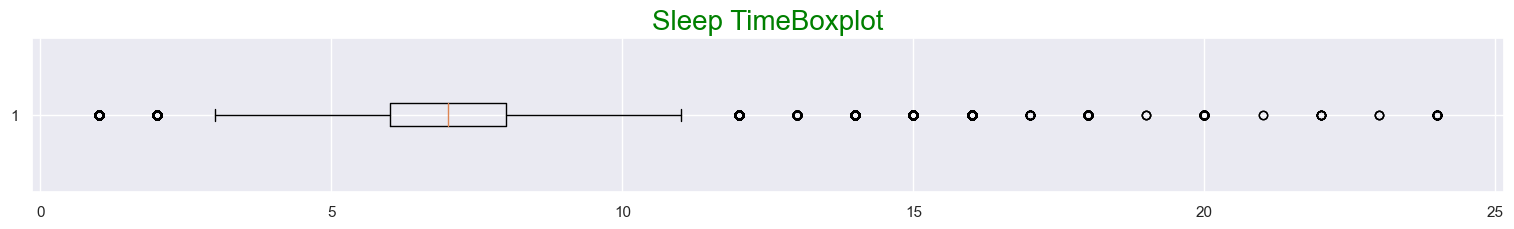

In [81]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(scaled_df['SleepTime'], vert=False)
plt.title(label="Sleep TimeBoxplot",fontsize=20, color="green")
plt.show()

In [82]:
print(f'Statistical analysis:\n',
      num_df["SleepTime"].describe())

Statistical analysis:
 count    301717.000000
mean          7.084559
std           1.467122
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64


2 option : using IQR method or taking pathological sleep 

In [83]:
#compute the IQR to calculate the bounderies
iqr = scaled_df["SleepTime"].quantile(0.75)-scaled_df["SleepTime"].quantile(0.25)
print('the IQR is:', iqr)

the IQR is: 2.0


In [84]:
# outliers
lower_bridge = scaled_df["SleepTime"].quantile(0.25)+(iqr*1.5)
upper_bridge = scaled_df["SleepTime"].quantile(0.75)+(iqr*1.5)
print('threshold for the outliers, lower bridge', lower_bridge, 'and upper bridge', upper_bridge)

threshold for the outliers, lower bridge 9.0 and upper bridge 11.0


In [85]:
print(f'percentage of outliers (lower bridge) in the Sleep Time feature:',
      round(sum(i > 9.0 for i in scaled_df['SleepTime'])/scaled_df['SleepTime'].shape[0]*100, 2),'%')

percentage of outliers (lower bridge) in the Sleep Time feature: 3.78 %


In [86]:
print(f'percentage of outliers (uper bridge) in the Sleep Time feature:',
      round(sum(i > 11.0 for i in scaled_df['SleepTime'])/scaled_df['SleepTime'].shape[0]*100, 2),'%')

percentage of outliers (uper bridge) in the Sleep Time feature: 1.06 %


**note: average in population = 7 to 10; above 12 symptom of pathology**

In [87]:
print(f'percentage of outliers considered as pathological (above 12hours) in the Sleep Time feature:',
      round(sum(i > 12.0 for i in scaled_df['SleepTime'])/scaled_df['SleepTime'].shape[0]*100,4),'%')

percentage of outliers considered as pathological (above 12hours) in the Sleep Time feature: 0.3311 %


In [88]:
print(f'percentage of outliers considered as pathological (under 3 hours) in the Sleep Time feature:',
      round(sum(i < 3 for i in scaled_df['SleepTime'])/scaled_df['SleepTime'].shape[0]*100,4),'%')

percentage of outliers considered as pathological (under 3 hours) in the Sleep Time feature: 0.4438 %


In [89]:
scaled_df.loc[scaled_df["SleepTime"]>=12, "SleepTime"]=12
scaled_df.loc[scaled_df["SleepTime"]<=3, "SleepTime"]=3

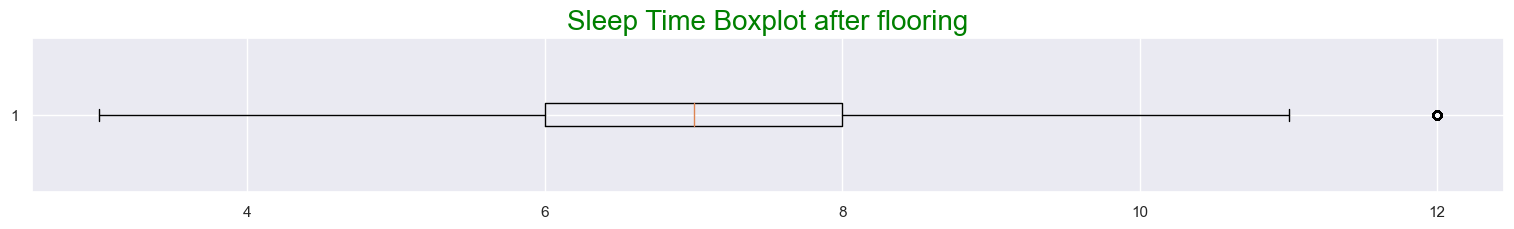

In [90]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(scaled_df['SleepTime'], vert=False)
plt.title(label="Sleep Time Boxplot after flooring",fontsize=20, color="green")
plt.show()

In [91]:
print(f'Statistical analysis:\n',
      scaled_df["SleepTime"].describe())

Statistical analysis:
 count    301717.000000
mean          7.078080
std           1.377433
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          12.000000
Name: SleepTime, dtype: float64


In [92]:
scaled_df['SleepTime_scaled'] = scaled_df['SleepTime']
scaled_df['SleepTime_scaled'] = (scaled_df['SleepTime_scaled'] - scaled_df['SleepTime_scaled'].min())/(scaled_df['SleepTime_scaled'].max() - scaled_df['SleepTime_scaled'].min())

In [93]:
scaled_df['SleepTime'] = round(scaled_df['SleepTime_scaled'], 3)
scaled_df.drop(columns=['SleepTime_scaled'], axis=1, inplace=True)

In [94]:
for col in scaled_df:
    print(f'{col:-<25} {scaled_df[col].unique()}')

HeartDisease------------- [0 1]
Sex---------------------- [1 0]
Race--------------------- [0 1 2 3 5 4]
Age_Gen------------------ [2 4 3 0 1]
BMICategory-------------- [0 1 2 3]
Diabetic----------------- [2 0 1 3]
Asthma------------------- [1 0]
Stroke------------------- [0 1]
KidneyDisease------------ [0 1]
SkinCancer--------------- [1 0]
GenHealth---------------- [3 1 2 0 4]
PhysicalActivity--------- [1 0]
PhysicalHealth----------- [0.1   0.    0.667 0.933 0.2   0.5   0.167 1.    0.233 0.033 0.067 0.7
 0.133 0.333 0.467 0.6   0.267 0.833 0.533 0.967 0.9   0.567 0.8   0.4
 0.767 0.867 0.733 0.633 0.3   0.433 0.367]
MentalHealth------------- [1.    0.    0.067 0.167 0.5   0.267 0.133 0.1   0.333 0.467 0.667 0.033
 0.233 0.8   0.3   0.933 0.533 0.4   0.2   0.833 0.567 0.6   0.7   0.967
 0.733 0.433 0.767 0.9   0.867 0.367 0.633]
SleepTime---------------- [0.222 0.444 0.556 0.333 1.    0.111 0.667 0.778 0.    0.889]
Smoking------------------ [1 0]
AlcoholDrinking---------- [0 1]
DiffWalk

we do not consider outliers in the others numerical values as we are looking for anomaly amongst the person with a heart disease.

note underspampling will help to understand and highligt when the answer is in the outliers

### Hot Encoding

In [95]:
HE_df  = scaled_df.copy()
HE_df.columns

Index(['HeartDisease', 'Sex', 'Race', 'Age_Gen', 'BMICategory', 'Diabetic',
       'Asthma', 'Stroke', 'KidneyDisease', 'SkinCancer', 'GenHealth',
       'PhysicalActivity', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Smoking', 'AlcoholDrinking', 'DiffWalking'],
      dtype='object')

In [96]:
HE_df = pd.get_dummies(HE_df, 
                        columns = ['Sex', 'Race','Age_Gen', 'BMICategory',
                                   'Smoking', 'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity',
                                   'GenHealth', 'Diabetic', 'Stroke', 'Asthma', 'KidneyDisease','SkinCancer' ], 
                        prefix = ['Sex', 'Race','Age', 'BMI', 'Smoking', 'Alcohol', 'DiffWalking', 'Activity',
                                   'GenHealth', 'Diabetic', 'Stroke', 'Asthma', 'KidneyDisease','SkinCancer'])
HE_df.head()

,HeartDisease,PhysicalHealth,MentalHealth,SleepTime,Sex_0,Sex_1,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,Smoking_0,Smoking_1,Alcohol_0,Alcohol_1,DiffWalking_0,DiffWalking_1,Activity_0,Activity_1,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,Stroke_0,Stroke_1,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0,0.100,1.0,0.222,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1
1,0,0.000,0.0,0.444,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0
2,0,0.667,1.0,0.556,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0
3,0,0.000,0.0,0.333,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
4,0,0.933,0.0,0.556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [97]:
for col in HE_df:
    print(f'{col:-<25} {HE_df[col].unique()}')

HeartDisease------------- [0 1]
PhysicalHealth----------- [0.1   0.    0.667 0.933 0.2   0.5   0.167 1.    0.233 0.033 0.067 0.7
 0.133 0.333 0.467 0.6   0.267 0.833 0.533 0.967 0.9   0.567 0.8   0.4
 0.767 0.867 0.733 0.633 0.3   0.433 0.367]
MentalHealth------------- [1.    0.    0.067 0.167 0.5   0.267 0.133 0.1   0.333 0.467 0.667 0.033
 0.233 0.8   0.3   0.933 0.533 0.4   0.2   0.833 0.567 0.6   0.7   0.967
 0.733 0.433 0.767 0.9   0.867 0.367 0.633]
SleepTime---------------- [0.222 0.444 0.556 0.333 1.    0.111 0.667 0.778 0.    0.889]
Sex_0-------------------- [0 1]
Sex_1-------------------- [1 0]
Race_0------------------- [1 0]
Race_1------------------- [0 1]
Race_2------------------- [0 1]
Race_3------------------- [0 1]
Race_4------------------- [0 1]
Race_5------------------- [0 1]
Age_0-------------------- [0 1]
Age_1-------------------- [0 1]
Age_2-------------------- [1 0]
Age_3-------------------- [0 1]
Age_4-------------------- [0 1]
BMI_0-------------------- [1 0]
BMI_

In the first step PCA is applied on the dataset to compact the dataset and eliminate irrelevant features and in the second step SMOTE resampling is carried out to balance the class distribution and increase the variety of sample domain. Finally, XXX classifier is applied on the resulting dataset and the results are compared and evaluation metrics are calculated. The experiments show the effectiveness of the proposed method across four evaluation metrics: <span class="mark">Overall accuracy, False Positive Rate, Precision, Recall</span>.

## Backup point before ML

In [98]:
#df target baseline
#target = heart_baseline['HeartDisease'].copy()
#target.to_csv('dataset/target.csv')

In [99]:
#df after rescaling 
#HE_df.to_csv('dataset/HE.csv')

In [100]:
#df LDA
#heart_lda.to_csv('dataset/Heart_ml.csv')

In [101]:
#df target resampling
#target_lda.to_csv('dataset/target_lda.csv')

In [102]:
#df after resampling
#undersamp.to_csv('dataset/undersamp.csv')

In [103]:
heart_baseline = pd.read_csv("dataset/heart_baseline.csv")
scaled_df = pd.read_csv("dataset/HE.csv")
target = pd.read_csv("dataset/target.csv")

In [104]:
heart_baseline.head(1)

,Unnamed: 0,HeartDisease,Sex,Race,Age_Gen,BMICategory,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,DiffWalking
0,0,0,1,0,2,0,2,1,0,0,1,3,1,3.0,30.0,5.0,1,0,0


In [105]:
target.head(1)

,Unnamed: 0,HeartDisease
0,0,0


In [106]:
scaled_df.head(1)

,Unnamed: 0,HeartDisease,PhysicalHealth,MentalHealth,SleepTime,Sex_0,Sex_1,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,Smoking_0,Smoking_1,Alcohol_0,Alcohol_1,DiffWalking_0,DiffWalking_1,Activity_0,Activity_1,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,Stroke_0,Stroke_1,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0,0,0.1,1.0,0.222,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


In [107]:
heart_baseline.drop("Unnamed: 0", axis=1, inplace=True)
target.drop("Unnamed: 0", axis=1, inplace=True)
scaled_df.drop("Unnamed: 0", axis=1, inplace=True)

In [108]:
scaled_df.head(10)

,HeartDisease,PhysicalHealth,MentalHealth,SleepTime,Sex_0,Sex_1,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,Smoking_0,Smoking_1,Alcohol_0,Alcohol_1,DiffWalking_0,DiffWalking_1,Activity_0,Activity_1,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,Stroke_0,Stroke_1,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0,0.100,1.0,0.222,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1
1,0,0.000,0.0,0.444,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0
2,0,0.667,1.0,0.556,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0
3,0,0.000,0.0,0.333,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
4,0,0.933,0.0,0.556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
5,1,0.200,0.0,1.000,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
6,0,0.500,0.0,0.111,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
7,0,0.167,0.0,0.667,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
8,0,0.000,0.0,0.222,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
9,0,0.000,0.0,0.778,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0


# Machine learning

****

##  Choice of the model and dataset

### Before features engineering

**A dataframe compiling all the outcome form differents model of machine learning will be created**<br> **Note:** where parametres is "None", we choose the default parametres of the choosen model.

Ml choice between Simple model we will see later if we need to move to more complex one's - Note: small correlation so we exclude the naives bayses
- KNN
- decision tree
- logistic regression
- Naive Bayes classifier
**Note**: Metric in this case it is important to have a high recall, we want the lower number of false negative<br>
A false negative = actualY = 1 vs predicted = 0.
Recall attempts to answer the following question:What proportion of actual positives was identified correctly? Note: A model that produces no false negatives has a recall of 1.0.

In [109]:
X = heart_baseline
y= target
model = KNeighborsClassifier(n_neighbors=5)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
train_scr = round(model.score(X_test, y_test), 4)
accuracy_scr = round(accuracy_score(y_test, y_pred),4)
recall_scr = round(recall_score(y_test, y_pred),4)
precision_scr = round(precision_score(y_test, y_pred),4)
f1_scr = round(f1_score(y_test, y_pred),4)
      

In [111]:
print(f' the accuuracy is:', accuracy_scr, 'and the recall is:', recall_scr)

 the accuuracy is: 0.9654 and the recall is: 0.624


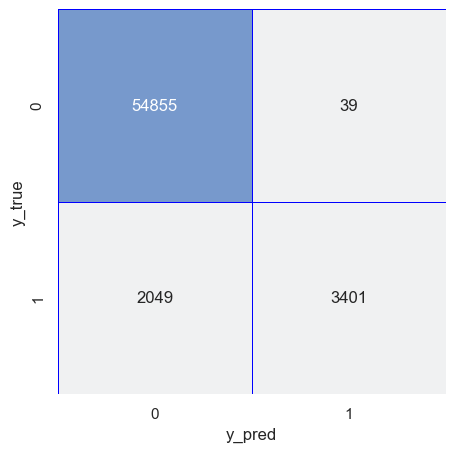

In [112]:
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
cmap = sns.light_palette("#79C")
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax, cmap=cmap, cbar=False)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Scaled dataset 

In [113]:
X = scaled_df
y= target
model = KNeighborsClassifier(n_neighbors=5)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
train_scr = round(model.score(X_test, y_test), 4)
accuracy_scr = round(accuracy_score(y_test, y_pred),4)
recall_scr = round(recall_score(y_test, y_pred),4)
precision_scr = round(precision_score(y_test, y_pred),4)
f1_scr = round(f1_score(y_test, y_pred),4)

In [115]:
print(f' the accuuracy is:', accuracy_scr, 'and the recall is:', recall_scr)

 the accuuracy is: 0.9744 and the recall is: 0.7374


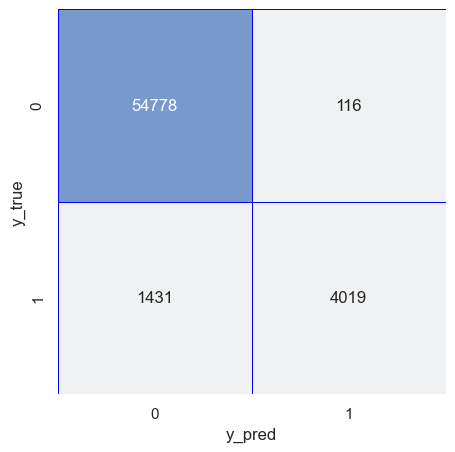

In [116]:
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))
cmap = sns.light_palette("#79C")
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax, cmap=cmap, cbar=False)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()